# Anticipated Compton Rates for the Polarized SuperKEKB Facility



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 600

In [2]:
# Units
eV = 1
GeV = 1e9 * eV
m = 1
cm = 1e-2 * m
mm = 1e-3 * m
s = 1
Hz = 1
kHz = 1e3*Hz
MHz = 1e6*Hz
deg = np.radians(1)

# Fundamental constants
c = 2.99792458e8 # Speed of light [m/s]
e = 1.602e-19 # Charge of electron [C]
m_e = 510.99895e3 # Mass of the electron [eV] 
h_e = 4.135667696e-15 # Planck constant [eV s]
h = h_e*e # Planck constant [J s]
r0 = 2.81794e-15 # Classical electron radius [m]
barn = 1e-28 # Unit conversion [m^2]

In [3]:
default_k = 2.33 * eV
default_E = 18 * GeV

## Electron beam parameters

### Polarized High Energy Ring of SuperKEKB

- Energy of the High Energy Ring: 7 GeV electrons
- Anticipated polarization: 70%
- Bunch charge: 4 nC
- Number of bunches: 2500
- Stored current: 2.6 A
- Bunch length: sigma_z = 5 mm
- Beam size: sigma_x, sigma_y = 11 um, 62 nm
- Emittance H: 4.6 nm
- Normalized emittance H/V: 40/20 mm.rad

In [4]:
# Electron beam
N = 2500 # Number of bunches
E = 7*GeV  # Electron energy [eV]
p = math.sqrt(E*E - m_e*m_e) # Electron momentum [eV]
I = 2.6 # Electron beam current [A]
f = 250e6 # Repetition rate [Hz]
N_e = I/e/N/c # Bunch population
N_e = 2.5e10
P_e = 0.70 # Electron polarization [%]

# Electron beam waist
betax = 10 # [m]
betay = 50 # [m]
ex = 24e-9 # [m]
ey = 2e-9  # [m]
sex = math.sqrt(ex*betax)
sey = math.sqrt(ey*betay)
sez = 10e-3 # [m]

In [5]:
print(sex/mm, sey/mm, sez/mm)

0.48989794855663554 0.31622776601683794 10.0


### Polarized Electrons in EIC

In [6]:
# Electron beam
N = 2500 # Number of bunches
E = 18*GeV  # Electron energy [eV]
p = math.sqrt(E*E - m_e*m_e) # Electron momentum [eV]
Q = 10e-9 # Bunch charge [C]
f = 250e6 # Repetition rate [Hz]
P_e = 0.85 # Electron polarization [%]

# Electron beam waist
betax = 10 # [m]
betay = 50 # [m]
ex = 24e-9 # [m]
ey = 2e-9  # [m]
sex = math.sqrt(ex*betax)
sey = math.sqrt(ey*betay)
sez = 10e-3 # [m]

# Electron beam frequency
f_b = 78e3 # [Hz]
I = Q*f_b

## Photon beam parameters

In [7]:
# Photon beam
P = 1000   # Photon power [W]
l = 515e-9 # 248 nm, 532 nm, 1064 nm [m]
k = h_e*c/l 
k = 2.33 * eV
P_gamma = 1.00 # Photon polarization [%]

# Photon beam waist
spx = 0.1e-3 # [m]
spy = 0.1e-3 # [m]

# Photon pulse length
spt = 12e-12 # [s]
spz = c*spt

### Crossing Angle

In [8]:
# Kinematics
alpha_c_deg = 1 # Crossing angle [deg]
alpha_c = math.radians(alpha_c_deg)

#Compton Scattering

The relevant kinematic variables for Compton scattering are $p$ and $p'$ for the incoming and scattered electron, and $k$ and $k'$ for the incoming and scattered photon.

Most relevant quantities can be expressed in terms of the kinematic factor $a = (1 + 4 k E / m^2)^{-1}$, which only depends on the incoming photon energy $k$ and electron energy $E$.

There is a maximum energy for the scattered photon at $k'_{max} = 4 a k E^2/m^2$, the "Compton edge", corresponding with a minimum scattered electron energy $E'_{min} = E - k'_{max}$. All energy-dependent quantities can be expressed in terms of $\rho = k' / k'_{max}$.



In [9]:
# Scattered photons

# Kinematic constant
def _a(k = default_k, E = default_E):
    return 1 / (1 + 4*k*E/m_e/m_e)

# Maximum photon energy
def _kp_max(k = default_k, E = default_E):
    return 4*_a(k,E)*k*(E*E)/(m_e*m_e)

a = _a(k, E)
kp_max = _kp_max(k, E) # Maximum photon energy
Ep_min = E - kp_max # Minimum electron energy
theta_g_half = m_e / E / math.sqrt(a)

# Scattered electrons
theta_e_max = 2*k/m_e

# Values
print("a = ", a)
print("k'_max [GeV] = ", kp_max/GeV)
print("E'_min [GeV] = ", Ep_min/GeV)

a =  0.6088415673539215
k'_max [GeV] =  7.040851787629415
E'_min [GeV] =  10.959148212370586




### Differential Cross Section

The differential cross section is $$\frac{d\sigma}{d\rho} = 2\pi r_0^2 a \Bigl[ \frac{\rho^2(1-a)^2}{1-\rho(1-a)} + 1 + \Bigl(\frac{1-\rho(1+a)}{1-\rho(1-a)} \Bigr)^2 \Bigr].$$ Integrated over the full energy range, the total cross section is $$\sigma = \pi r_0^2 a \frac{\bigl(-1 - 14a + 16a^2 - 2a^3 + a^4 + 2\ln{a} - 12a\ln{a} - 6a^2\ln{a}\bigr)}{(a - 1)^3}.$$


0.5398493226141556
0.5399644877033122
0.5399644877033122
0.5399644884067181
0.5399663665759186


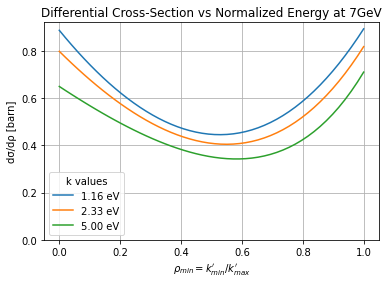

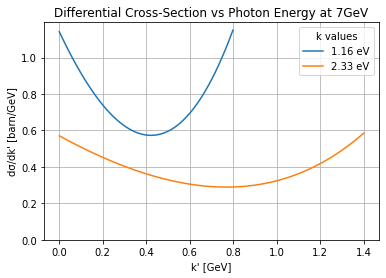

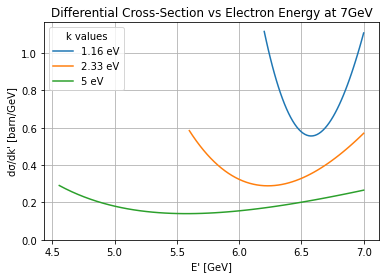

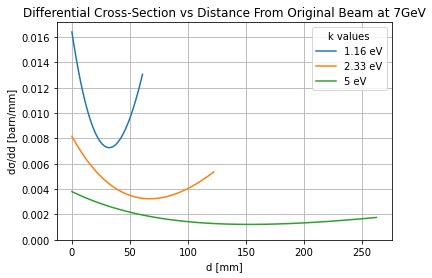

In [10]:
# Differential cross section
def dsigma (rho, k = default_k, E = default_E):
    a = _a(k, E)
    return 2 * math.pi * r0**2 * a * \
    (np.square(rho*(1-a))/(1-rho*(1-a)) + 1 + np.square((1-rho*(1+a))/(1-rho*(1-a))))

# Total cross section
def sigma (k = default_k, E = 7e9):
    a = _a(k, E)
    return math.pi * r0**2 * a * \
    (-1 - 14*a + 16*a**2 - 2*a**3 + a**4 + 2*math.log(a) - 12*a*math.log(a) - 6*a**2*math.log(a)) \
    / math.pow(a-1, 3)

def dist(E, d=25*m):
  angle = 7*GeV * 1.12*deg / E
  x = d * np.tan(1.12*deg)
  y = d * np.tan(angle)
  return (y-x)

def dist_diff(E, d=25*m):
  angle = 7*GeV * 1.12*deg / E
  x = d * np.tan(1.12*deg)
  y = d * (-7*GeV*1.12*deg/E**2)/(np.cos(angle))**2
  return y

rho = np.linspace(0,1)

## Integrals to validate proper unit conversions
print(sigma()/barn)
print(np.trapz(dsigma(rho, k, 7*GeV)/barn, rho))
print(np.trapz(dsigma(rho, k, 7*GeV)/_kp_max(k, 7*GeV)/barn*GeV, rho*_kp_max(k, 7*GeV)/GeV))
print(np.trapz(dsigma(rho, k, 7*GeV)/_kp_max(k, 7*GeV)/barn*GeV, np.sort(7*GeV-rho*_kp_max(k, 7*GeV)/GeV)))
print(np.trapz(dsigma(rho, k, 7*GeV) / -_kp_max(k, 7*GeV)*GeV / (dist_diff(7*GeV - rho*_kp_max(k, 7*GeV))/(mm/GeV))/barn
               , dist(7*GeV-rho*_kp_max(k, 7*GeV))/mm))
dsigma(rho, k, 7*GeV) / -_kp_max(k, 7*GeV)*GeV / (dist_diff(7*GeV - rho*_kp_max(k, 7*GeV))/(mm/GeV))/barn
# Configuring figure for E = 18GeV

# ax = plt.figure()
# ax = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', ylabel="dσ/dρ [barn]",
#                  title="Differential Cross-Section vs Normalized Energy at 18GeV")
# ax.grid()

# Plots of normalized cross section versus normalized energy, overlayed for
# energy values of 1.16, k, and 5.00 eV, for E = 18GeV

# ax.plot(rho, dsigma(rho, 1.16)/barn, label = "1.16 eV")
# ax.plot(rho, dsigma(rho, k)/barn, label = str(round(k, 2)) + " eV")
# ax.plot(rho, dsigma(rho, 5.00)/barn, label = "5.00 eV")
# ax.set_ylim(bottom = 0)
# ax.legend(title="k values")

####

# Repeating the process for E = 7GeV

bx = plt.figure()
bx = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', ylabel="dσ/dρ [barn]",
                 title="Differential Cross-Section vs Normalized Energy at 7GeV")
bx.grid()

# Plots

bx.plot(rho, dsigma(rho, 1.16, 7*GeV)/barn, label = "1.16 eV")
bx.plot(rho, dsigma(rho, k, 7*GeV)/barn, label = str(round(k, 2)) + " eV")
bx.plot(rho, dsigma(rho, 5.00, 7*GeV)/barn, label = "5.00 eV")
bx.set_ylim(bottom = 0)
bx.legend(title="k values")

####

# Repeating the process for E = 7GeV but with axes in GeV

cx = plt.figure()
cx = plt.subplot(xlabel="k' [GeV]", ylabel="dσ/dk' [barn/GeV]",
                 title="Differential Cross-Section vs Photon Energy at 7GeV")
cx.grid()

# Plots
cx.plot(rho*_kp_max(1.2, 7*GeV)/GeV, dsigma(rho, 1.2, 7*GeV)/_kp_max(1.16, 7*GeV)/barn*GeV, label = "1.16 eV")
cx.plot(rho*_kp_max(k, 7*GeV)/GeV, dsigma(rho, k, 7*GeV)/_kp_max(k, 7*GeV)/barn*GeV, label = str(round(k, 2)) + " eV")
# cx.plot(rho*_kp_max(5.00, 7*GeV)/GeV, dsigma(rho, 5.00, 7*GeV)/_kp_max(5, 7*GeV)/barn*GeV, label = "5.00 eV")
cx.set_ylim(bottom = 0)
cx.legend(title="k values")

## electron plot

####

# Repeating the process for E = 7GeV but with axes in GeV

dx = plt.figure()
dx = plt.subplot(xlabel="E' [GeV]", ylabel="dσ/dk' [barn/GeV]",
                 title="Differential Cross-Section vs Electron Energy at 7GeV")
dx.grid()

# Plots
dx.plot((7*GeV-rho*_kp_max(1.2, 7*GeV)) / GeV, dsigma(rho, 1.2, 7*GeV)/(_kp_max(1.2, 7*GeV)) / (barn/GeV), label = "1.16 eV")
dx.plot((7*GeV-rho*_kp_max(  k, 7*GeV)) / GeV, dsigma(rho,   k, 7*GeV)/(_kp_max(  k, 7*GeV)) / (barn/GeV), label = str(round(k, 2)) + " eV")
dx.plot((7*GeV-rho*_kp_max(  5, 7*GeV)) / GeV, dsigma(rho,   5, 7*GeV)/(_kp_max(  5, 7*GeV)) / (barn/GeV), label = "5 eV")
#dx.plot(7-rho*_kp_max(5, 7*GeV)/GeV, dsigma(rho, 5, 7*GeV)/(_kp_max(5, 7*GeV)*GeV)/barn, label = str(round(k, 2)) + " eV")
dx.set_ylim(bottom = 0)
dx.legend(title="k values")

# Distance plot
ex = plt.figure()
ex = plt.subplot(xlabel="d [mm]", ylabel="dσ/dd [barn/mm]",
                 title="Differential Cross-Section vs Distance From Original Beam at 7GeV")
ex.grid()

# Plots
ex.plot(dist(7*GeV-rho*_kp_max(1.16, 7*GeV))/mm, dsigma(rho, 1.16, 7*GeV) / -_kp_max(1.16, 7*GeV)*GeV / (dist_diff(7*GeV-rho*_kp_max(1.16, 7*GeV))/(mm/GeV))/barn, label = "1.16 eV")
ex.plot(dist(7*GeV-rho*_kp_max(   k, 7*GeV))/mm, dsigma(rho,    k, 7*GeV) / -_kp_max(   k, 7*GeV)*GeV / (dist_diff(7*GeV-rho*_kp_max(   k, 7*GeV))/(mm/GeV))/barn, label = str(round(k, 2)) + " eV")
ex.plot(dist(7*GeV-rho*_kp_max(   5, 7*GeV))/mm, dsigma(rho,    5, 7*GeV) / -_kp_max(   5, 7*GeV)*GeV / (dist_diff(7*GeV-rho*_kp_max(   5, 7*GeV))/(mm/GeV))/barn, label = "5 eV")
ex.set_ylim(bottom = 0)
ex.legend(title="k values")

### Longitudinal Asymmetry

The longitudinal asymmetry is given by $$A_{long} = \frac{2\pi r_0^2 a}{d\sigma/d\rho} \bigl(1-\rho(1+a)\bigr) \Bigl[ 1 - \frac{1}{\bigl(1-\rho(1-a)\bigr)^2}\Bigr].$$

Along_max =  0.459121201182272
rho_zero =  0.6215652431486528
k'_zero [GeV] =  17.99999999978541


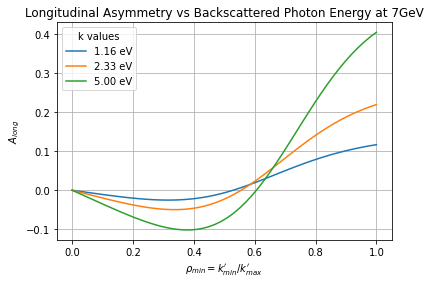

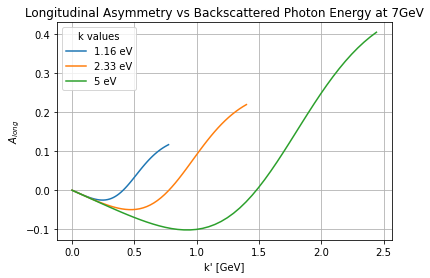

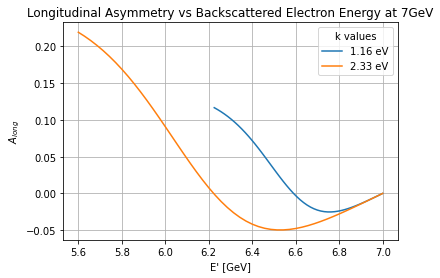

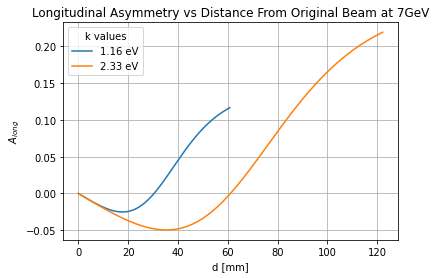

In [11]:
# Longitudinal asymmetry
def Along (rho, k = default_k, E = default_E):
    a = _a(k, E)
    return (1-rho*(1+a)) * (1 - 1/np.square(1-rho*(1-a))) / \
    (np.square(rho*(1-a))/(1-rho*(1-a)) + 1 + np.square((1-rho*(1+a))/(1-rho*(1-a))))

# Maximum longitudinal asymmetry
def Along_max (k = default_k, E = default_E):
    a = _a(k, E)
    return (1-a)*(1+a)/(1+a*a)
print("Along_max = ", Along_max(k, E))

# Zero crossing of asymmetry
def rho_zero (k = default_k, E = default_E):
    a = _a(k, E)
    return 1/(1+a)
def kp_zero (k = default_k, E = default_E):
    return 2*k*E*E/(m*m) / (1+2*k*E/(m*m))

print("rho_zero = ", rho_zero(k, E))
print("k'_zero [GeV] = ", kp_zero(k, E) / 1e9)

rho = np.linspace(0,1)

# Configuring figure for 18GeV
# ax = plt.figure()
# ax = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', ylabel="$A_{long}$", 
#                  title="Longitudinal Asymmetry vs Backscattered Photon Energy at 18GeV")
# ax.grid()

# Plots of normalized asymmetry versus normalized energy, overlayed for
# energy values of 1.16, k, and 5.00 eV, for E = 18GeV

# ax.plot(rho,Along(rho, 1.16), label = '1.16 eV')
# ax.plot(rho,Along(rho, k), label = str(round(k, 2)) + ' eV')
# ax.plot(rho,Along(rho, 5.00), label = '5.00 eV')
# ax.legend(title="k values")

####

# Repeating the process for 7GeV
bx = plt.figure()
bx = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', ylabel="$A_{long}$", 
                 title="Longitudinal Asymmetry vs Backscattered Photon Energy at 7GeV")
bx.grid()

# Plots

bx.plot(rho,Along(rho, 1.16, 7*GeV), label = '1.16 eV')
bx.plot(rho,Along(rho, k, 7*GeV), label = str(round(k, 2)) + ' eV')
bx.plot(rho,Along(rho, 5.00, 7*GeV), label = '5.00 eV')
bx.legend(title="k values")

####

# Repeating the process for 7GeV but with axes in GeV
cx = plt.figure()
cx = plt.subplot(xlabel="k' [GeV]", ylabel="$A_{long}$", 
                 title="Longitudinal Asymmetry vs Backscattered Photon Energy at 7GeV")
cx.grid()

# Plots

cx.plot(rho*_kp_max(1.16, 7*GeV)/GeV,Along(rho, 1.16, 7*GeV), label = '1.16 eV')
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,Along(rho, k, 7*GeV), label = str(round(k, 2)) + ' eV')
cx.plot(rho*_kp_max(5, 7*GeV)/GeV,Along(rho, 5, 7*GeV), label = '5 eV')
#cx.plot(rho*_kp_max(k, 7*GeV)/GeV, (dsigma(rho, k, 7*GeV)/_kp_max(k, 7*GeV)/barn * (1-Along(rho, k, 7*GeV)))*GeV, label = str(round(k, 2)) + " eV")
#cx.plot(rho*_kp_max(k, 7*GeV)/GeV, (dsigma(rho, k, 7*GeV)/_kp_max(k, 7*GeV)/barn * (1+Along(rho, k, 7*GeV)))*GeV, label = str(round(k, 2)) + " eV")

# cx.plot(rho*_kp_max(5.00, 7*GeV)/GeV,Along(rho, 5.00, 7*GeV), label = '5.00 eV')
cx.legend(title="k values")

# Electron energy at 7GeV
dx = plt.figure()
dx = plt.subplot(xlabel="E' [GeV]", ylabel="$A_{long}$", 
                 title="Longitudinal Asymmetry vs Backscattered Electron Energy at 7GeV")
dx.grid()

# Plots

dx.plot(7-rho*_kp_max(1.16, 7*GeV)/GeV, Along(rho, 1.16, 7*GeV), label = '1.16 eV')
dx.plot(7-rho*_kp_max(k, 7*GeV)/GeV, Along(rho, k, 7*GeV), label = str(round(k, 2)) + ' eV')
# dx.plot(7-rho*_kp_max(5.00, 7*GeV)/GeV,Along(rho, 5.00, 7*GeV), label = '5.00 eV')
dx.legend(title="k values")

# Distance at 7GeV
ex = plt.figure()
ex = plt.subplot(xlabel="d [mm]", ylabel="$A_{long}$", 
                 title="Longitudinal Asymmetry vs Distance From Original Beam at 7GeV")
ex.grid()

# Plots

ex.plot(dist(7*GeV-rho*_kp_max(1.16, 7*GeV)) / mm, Along(rho, 1.16, 7*GeV), label = '1.16 eV')
ex.plot(dist(7*GeV-rho*_kp_max(k, 7*GeV)) / mm, Along(rho, k, 7*GeV), label = str(round(k, 2)) + ' eV')
# ex.plot(7-rho*_kp_max(5.00, 7*GeV)/GeV,Along(rho, 5.00, 7*GeV), label = '5.00 eV')
ex.legend(title="k values")

### Transverse Asymmetry

The transverse asymmetry has a $\cos\phi$ modulation with amplitude given by $$A_{trans} = \frac{2\pi r_0^2 a}{d\sigma/d\rho} \Bigl[\rho(1-a)\frac{\sqrt{4a\rho(1-\rho)}}{\bigl(1-\rho(1-a)\bigr)}\Bigr].$$

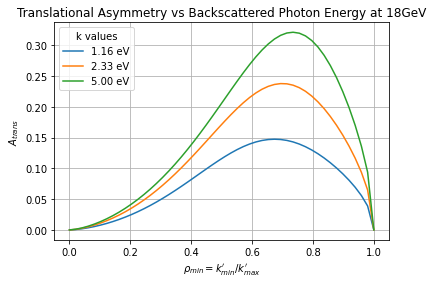

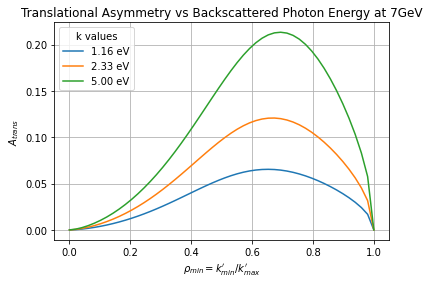

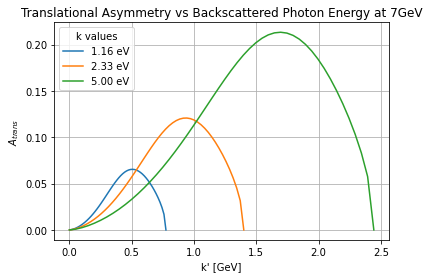

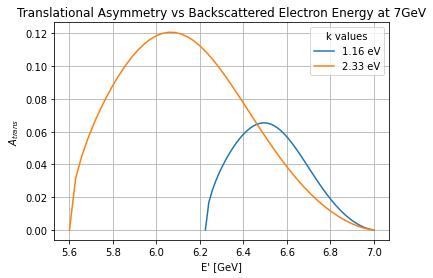

In [39]:
# Transverse asymmetry
def Atrans (rho, k = default_k, E = default_E):
    a = _a(k, E)
    return rho*(1-a) * np.sqrt(4*a*rho*(1-rho))/(1-rho*(1-a)) / \
    (np.square(rho*(1-a))/(1-rho*(1-a)) + 1 + np.square((1-rho*(1+a))/(1-rho*(1-a))))

rho = np.linspace(0,1)

# Configuring figure for 18GeV

ax = plt.figure()
ax = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', ylabel="$A_{trans}$", 
                 title="Translational Asymmetry vs Backscattered Photon Energy at 18GeV")
ax.grid()

# Plots of normalized asymmetry versus normalized energy, overlayed for
# energy values of 1.16, k, and 5.00 eV, for E = 18GeV

ax.plot(rho,Atrans(rho, 1.16), label = '1.16 eV')
ax.plot(rho,Atrans(rho, k), label = str(round(k, 2)) + ' eV')
ax.plot(rho,Atrans(rho, 5.00), label = '5.00 eV')
ax.legend(title="k values")

####

# Repeating the process for 7GeV

bx = plt.figure()
bx = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', ylabel="$A_{trans}$", 
                 title="Translational Asymmetry vs Backscattered Photon Energy at 7GeV")
bx.grid()

# Plots

bx.plot(rho,Atrans(rho, 1.16, 7*GeV), label = '1.16 eV')
bx.plot(rho,Atrans(rho, k, 7*GeV), label = str(round(k, 2)) + ' eV')
bx.plot(rho,Atrans(rho, 5.00, 7*GeV), label = '5.00 eV')
bx.legend(title="k values")

####

# Repeating the process for 7GeV but with axes in GeV

cx = plt.figure()
cx = plt.subplot(xlabel="k' [GeV]", ylabel="$A_{trans}$", 
                 title="Translational Asymmetry vs Backscattered Photon Energy at 7GeV")
cx.grid()

# Plots

cx.plot(rho*_kp_max(1.16, 7*GeV)/GeV,Atrans(rho, 1.16, 7*GeV), label = '1.16 eV')
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,Atrans(rho, k, 7*GeV), label = str(round(k, 2)) + ' eV')
cx.plot(rho*_kp_max(5.00, 7*GeV)/GeV,Atrans(rho, 5.00, 7*GeV), label = '5.00 eV')
cx.legend(title="k values")

# Repeating the process for electron energy

dx = plt.figure()
dx = plt.subplot(xlabel="E' [GeV]", ylabel="$A_{trans}$", 
                 title="Translational Asymmetry vs Backscattered Electron Energy at 7GeV")
dx.grid()

# Plots

dx.plot(7-rho*_kp_max(1.16, 7*GeV)/GeV,Atrans(rho, 1.16, 7*GeV), label = '1.16 eV')
dx.plot(7-rho*_kp_max(k, 7*GeV)/GeV,Atrans(rho, k, 7*GeV), label = str(round(k, 2)) + ' eV')
# dx.plot(7-rho*_kp_max(5.00, 7*GeV)/GeV,Atrans(rho, 5.00, 7*GeV), label = '5.00 eV')
dx.legend(title="k values")

## Asymmetry Averaging Methods

There are three methods of measuring the longitudinal asymmetry:
- a differential measurement in its energy bins,
- an integrating measurement across an energy range,
- an energy-weighted integrating measurement across an energy range.

In each case we define the average as $$\langle f \rangle = \frac{\int_{\rho_{min}}^1 \frac{d\sigma}{d\rho} f(\rho) d\rho}{\int_{\rho_{min}}^1 \frac{d\sigma}{d\rho} d\rho}.$$


In [13]:
# General averaging function
def avg (f, k = default_k, E = default_E, rho_min = 0, rho_max = 1):
    return integrate.quad(lambda rho: dsigma(rho, k, E) * f(rho, k, E), rho_min, rho_max)[0] / \
           integrate.quad(lambda rho: dsigma(rho, k, E), rho_min, rho_max)[0]

### Regular Average

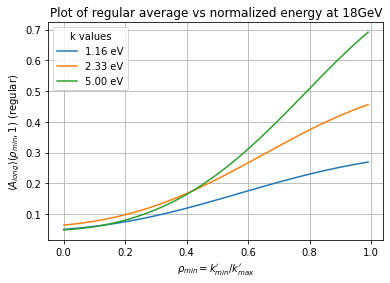

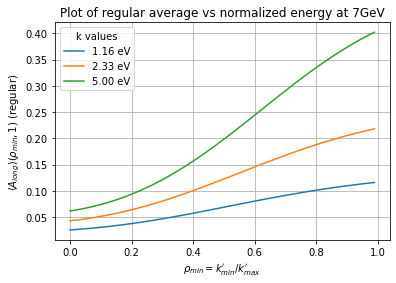

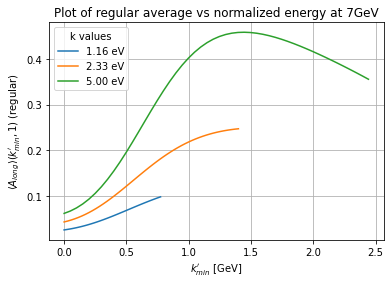

In [14]:
# Regular average
def avg_regular (k = default_k, E = default_E, rho_min = 0, rho_max = 1):
    return avg(lambda rho, k, E: Along(rho, k, E), k, E, rho_min, rho_max)

def avg_regular_energyweighted (k = default_k, E = default_E, rho_min = 0, rho_max = 1):
    return avg(lambda rho, k, E: Along(rho, k, E) * rho, k, E, rho_min, rho_max) / \
           avg(lambda rho, k, E: rho, k, E, rho_min, rho_max)

# Plot of regular average versus normalized energy
rho_min = np.linspace(0.0,0.99)

# Setting up figure for 18GeV
ax = plt.figure()
ax = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', 
                 ylabel=r'$\langle A_{long} \rangle(\rho_{min},1)$ (regular)', 
                 title="Plot of regular average vs normalized energy at 18GeV")
ax.grid()

# Plotting for 18GeV
ax.plot(rho_min,[avg_regular(1.16, E, rho_min, 1) for rho_min in rho_min], label = '1.16 eV');
ax.plot(rho_min,[avg_regular(k, E, rho_min, 1) for rho_min in rho_min], label = str(round(k, 2)) + ' eV');
ax.plot(rho_min,[avg_regular(5, E, rho_min, 1) for rho_min in rho_min], label = '5.00 eV');
ax.legend(title="k values")

# Setting up figure for 7GeV
bx = plt.figure()
bx = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', 
                 ylabel=r'$\langle A_{long} \rangle(\rho_{min},1)$ (regular)', 
                 title="Plot of regular average vs normalized energy at 7GeV")
bx.grid()

# Plotting for 7GeV
bx.plot(rho_min,[avg_regular(1.16, 7*GeV, rho_min, 1) for rho_min in rho_min], label = '1.16 eV');
bx.plot(rho_min,[avg_regular(k, 7*GeV, rho_min, 1) for rho_min in rho_min], label = str(round(k, 2)) + ' eV');
bx.plot(rho_min,[avg_regular(5, 7*GeV, rho_min, 1) for rho_min in rho_min], label = '5.00 eV');
bx.legend(title="k values")

# Setting up figure for 7GeV with axes in GeV
cx = plt.figure()
cx = plt.subplot(xlabel="$k^\prime_{min}$ [GeV]", 
                 ylabel=r"$\langle A_{long} \rangle(k^\prime_{min},1)$ (regular)", 
                 title="Plot of regular average vs normalized energy at 7GeV")
cx.grid()

kpr = rho_min*_kp_max(1.16, 7*GeV)/GeV
kpr1 = rho_min*_kp_max(k, 7*GeV)/GeV
kpr2 = rho_min*_kp_max(5, 7*GeV)/GeV
# Plotting for 7GeV
cx.plot(rho*_kp_max(1.16, 7*GeV)/GeV,[avg_regular(1.16, 7*GeV, kpr, 1) for kpr in kpr], label = '1.16 eV');
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,[avg_regular(k, 7*GeV, kpr1, 1) for kpr1 in kpr1], label = str(round(k, 2)) + ' eV');
cx.plot(rho*_kp_max(5, 7*GeV)/GeV,[avg_regular(5, 7*GeV, kpr2, 1) for kpr2 in kpr2], label = '5.00 eV');
cx.legend(title="k values")

### Differential Average

Using the differential method, the time $t_D$ to reach uncertainty $\Delta P_e/P_e$ is $$t_D^{-1} \approx \mathcal{L} \Bigl( \frac{\Delta P_e}{P_e} \Bigr)^2 P_e^2 P_\gamma^2 \sigma_t \langle A^2 \rangle,$$ so we use the average of the squared asymmetry $\langle A^2 \rangle$ as a figure of merit.

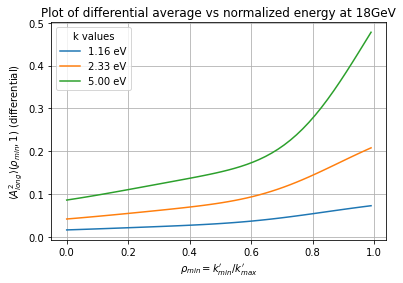

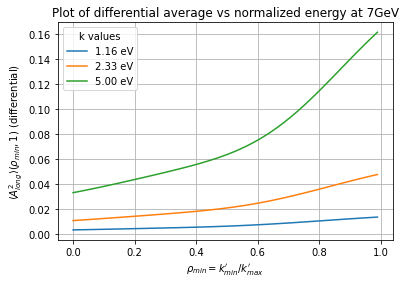

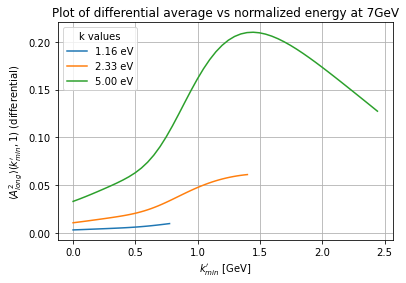

In [15]:
# Average for differential method
def avg_differential (k = default_k, E = default_E, rho_min = 0, rho_max = 1):
    return avg(lambda rho, k, E: Along(rho, k, E) * Along(rho, k, E), k, E, rho_min, rho_max)

# Plot of differential average versus normalized energy
rho_min = np.linspace(0.0,0.99)

# Setting up figure for 18GeV
ax = plt.figure()
ax = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', 
                 ylabel=r'$\langle A_{long}^2 \rangle(\rho_{min},1)$ (differential)', 
                 title="Plot of differential average vs normalized energy at 18GeV")
ax.grid()

# Plotting for 18GeV

ax.plot(rho_min,[avg_differential(1.16, E, rho_min, 1) for rho_min in rho_min], label = '1.16 eV');
ax.plot(rho_min,[avg_differential(k, E, rho_min, 1) for rho_min in rho_min], label = str(round(k, 2)) + ' eV');
ax.plot(rho_min,[avg_differential(5.00, E, rho_min, 1) for rho_min in rho_min], label = '5.00 eV');
ax.legend(title="k values")

# Setting up figure for 7GeV
bx = plt.figure()
bx = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', 
                 ylabel=r'$\langle A_{long}^2 \rangle(\rho_{min},1)$ (differential)', 
                 title="Plot of differential average vs normalized energy at 7GeV")
bx.grid()

# Plotting for 7GeV

bx.plot(rho_min,[avg_differential(1.16, 7*GeV, rho_min, 1) for rho_min in rho_min], label = '1.16 eV');
bx.plot(rho_min,[avg_differential(k, 7*GeV, rho_min, 1) for rho_min in rho_min], label = str(round(k, 2)) + ' eV');
bx.plot(rho_min,[avg_differential(5.00, 7*GeV, rho_min, 1) for rho_min in rho_min], label = '5.00 eV');
bx.legend(title="k values")

# Setting up figure for 7GeV with axes in GeV
cx = plt.figure()
cx = plt.subplot(xlabel="$k^\prime_{min}$ [GeV]", 
                 ylabel=r"$\langle A_{long}^2 \rangle(k^\prime_{min},1)$ (differential)", 
                 title="Plot of differential average vs normalized energy at 7GeV")
cx.grid()

# Plotting for 7GeV
cx.plot(rho*_kp_max(1.16, 7*GeV)/GeV,[avg_differential(1.16, 7*GeV, kpr, 1) for kpr in kpr], label = '1.16 eV');
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,[avg_differential(k, 7*GeV, kpr1, 1) for kpr1 in kpr1], label = str(round(k, 2)) + ' eV');
cx.plot(rho*_kp_max(5, 7*GeV)/GeV,[avg_differential(5, 7*GeV, kpr2, 1) for kpr2 in kpr2], label = '5.00 eV');
cx.legend(title="k values")

### Integrated Average

Using the integral method, the time $t_I$ to reach uncertainty $\Delta P_e/P_e$ is $$t_I^{-1} \approx \mathcal{L} \Bigl( \frac{\Delta P_e}{P_e} \Bigr)^2 P_e^2 P_\gamma^2 \sigma_t \langle A \rangle^2,$$ so we use the squared average of the asymmetry $\langle A \rangle^2$ as a figure of merit.

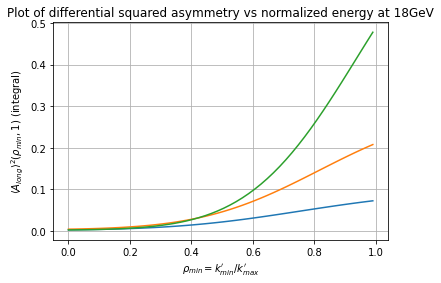

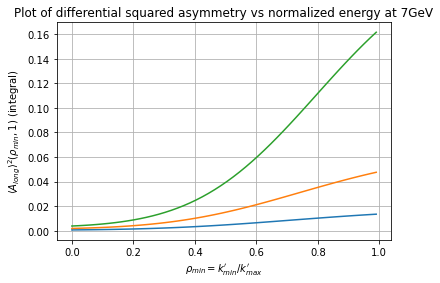

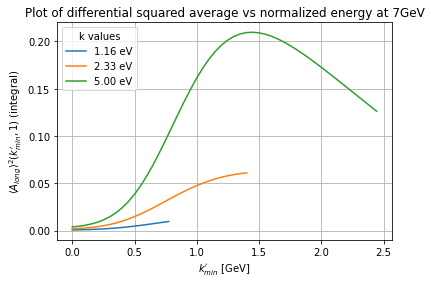

In [16]:
def avg_integral (k = default_k, E = default_E, rho_min = 0, rho_max = 1):
    return np.square(avg(Along, k, E, rho_min, rho_max))

# Plot of differential squared asymmetry versus normalized energy
rho_min = np.linspace(0.0,0.99)


# Setting up figure for 18GeV
ax = plt.figure()
ax = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', 
                 ylabel=r'$\langle A_{long} \rangle^2(\rho_{min},1)$ (integral)', 
                 title="Plot of differential squared asymmetry vs normalized energy at 18GeV")
ax.grid()

# Plotting for 18GeV
ax.plot(rho_min,[avg_integral(1.16, E, rho_min, 1) for rho_min in rho_min]);
ax.plot(rho_min,[avg_integral(k, E, rho_min, 1) for rho_min in rho_min]);
ax.plot(rho_min,[avg_integral(5, E, rho_min, 1) for rho_min in rho_min]);

# Setting up figure for 7GeV
bx = plt.figure()
bx = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', 
                 ylabel=r'$\langle A_{long} \rangle^2(\rho_{min},1)$ (integral)', 
                 title="Plot of differential squared asymmetry vs normalized energy at 7GeV")
bx.grid()

# Plotting for 7GeV
bx.plot(rho_min,[avg_integral(1.16, 7*GeV, rho_min, 1) for rho_min in rho_min]);
bx.plot(rho_min,[avg_integral(k, 7*GeV, rho_min, 1) for rho_min in rho_min]);
bx.plot(rho_min,[avg_integral(5, 7*GeV, rho_min, 1) for rho_min in rho_min]);

# Setting up figure for 7GeV with axes in GeV
cx = plt.figure()
cx = plt.subplot(xlabel="$k^\prime_{min}$ [GeV]", 
                 ylabel=r"$\langle A_{long} \rangle^2(k^\prime_{min},1)$ (integral)", 
                 title="Plot of differential squared average vs normalized energy at 7GeV")
cx.grid()

# Plotting for 7GeV
cx.plot(rho*_kp_max(1.16, 7*GeV)/GeV,[avg_integral(1.16, 7*GeV, kpr, 1) for kpr in kpr], label = '1.16 eV');
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,[avg_integral(k, 7*GeV, kpr1, 1) for kpr1 in kpr1], label = str(round(k, 2)) + ' eV');
cx.plot(rho*_kp_max(5, 7*GeV)/GeV,[avg_integral(5, 7*GeV, kpr2, 1) for kpr2 in kpr2], label = '5.00 eV');
cx.legend(title="k values")


### Energy-Weighted Integrated Average

Using the energy-weighted integral method, the time $t_D$ to reach uncertainty $\Delta P_e/P_e$ is $$t_D^{-1} \approx \mathcal{L} \Bigl( \frac{\Delta P_e}{P_e} \Bigr)^2 P_e^2 P_\gamma^2 \sigma_t \frac{\langle E A \rangle^2}{\langle E^2 \rangle},$$ so we use the average of the asymmetry $\frac{\langle E A \rangle^2}{\langle E^2 \rangle}$ as a figure of merit.

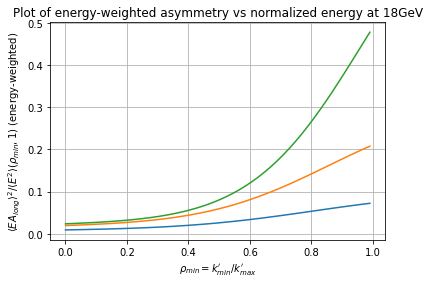

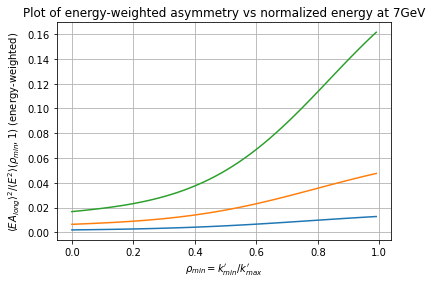

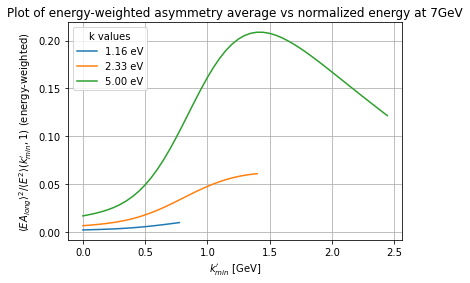

In [17]:
def avg_energyweighted (k = default_k, E = default_E, rho_min = 0, rho_max = 1):
    return np.square(avg(lambda rho, k, E: Along(rho, k, E) * rho, k, E, rho_min, rho_max)) / \
           avg(lambda rho, k, E: rho*rho, k, E, rho_min, rho_max)

# Plot of energy-weighted asymmetry versus normalized energy
rho_min = np.linspace(0.0,0.99)

# Setting up figure for 18GeV
ax = plt.figure()
ax = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', 
                 ylabel=r'$\langle E A_{long} \rangle^2/\langle E^2 \rangle(\rho_{min},1)$ (energy-weighted)', 
                 title="Plot of energy-weighted asymmetry vs normalized energy at 18GeV")
ax.grid()

# Plotting for 18GeV
ax.plot(rho_min,[avg_energyweighted(1.16, E, rho_min, 1) for rho_min in rho_min]);
ax.plot(rho_min,[avg_energyweighted(k, E, rho_min, 1) for rho_min in rho_min]);
ax.plot(rho_min,[avg_energyweighted(5, E, rho_min, 1) for rho_min in rho_min]);

# Setting up figure for 7GeV
bx = plt.figure()
bx = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$', 
                 ylabel=r'$\langle E A_{long} \rangle^2/\langle E^2 \rangle(\rho_{min},1)$ (energy-weighted)', 
                 title="Plot of energy-weighted asymmetry vs normalized energy at 7GeV")
bx.grid()

# Plotting for 7GeV
bx.plot(rho_min,[avg_energyweighted(1.13, 7*GeV, rho_min, 1) for rho_min in rho_min]);
bx.plot(rho_min,[avg_energyweighted(k, 7*GeV, rho_min, 1) for rho_min in rho_min]);
bx.plot(rho_min,[avg_energyweighted(5, 7*GeV, rho_min, 1) for rho_min in rho_min]);

# Setting up figure for 7GeV with axes in GeV
cx = plt.figure()
cx = plt.subplot(xlabel="$k^\prime_{min}$ [GeV]", 
                 ylabel=r"$\langle E A_{long} \rangle^2/\langle E^2 \rangle(k^\prime_{min},1)$ (energy-weighted)", 
                 title="Plot of energy-weighted asymmetry average vs normalized energy at 7GeV")
cx.grid()

# Plotting for 7GeV
cx.plot(rho*_kp_max(1.16, 7*GeV)/GeV,[avg_energyweighted(1.16, 7*GeV, kpr, 1) for kpr in kpr], label = '1.16 eV');
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,[avg_energyweighted(k, 7*GeV, kpr1, 1) for kpr1 in kpr1], label = str(round(k, 2)) + ' eV');
cx.plot(rho*_kp_max(5, 7*GeV)/GeV,[avg_energyweighted(5, 7*GeV, kpr2, 1) for kpr2 in kpr2], label = '5.00 eV');
cx.legend(title="k values")

### Comparison

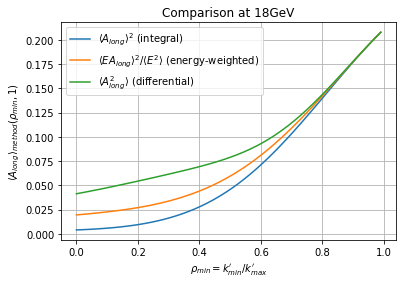

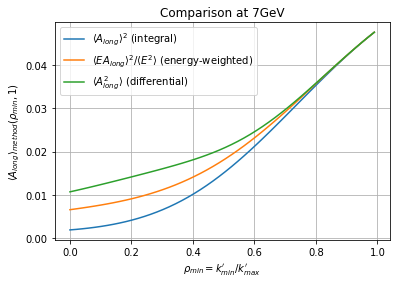

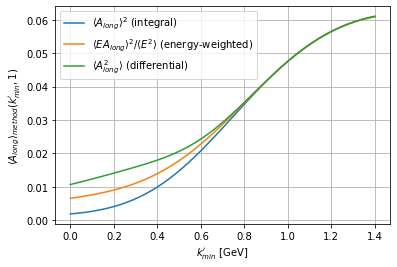

In [18]:
rho_min = np.linspace(0.0,0.99)

# Configuring plot at 18GeV
ax = plt.figure()
ax = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$',
                 ylabel=r'$\langle A_{long} \rangle_{method}(\rho_{min},1)$',
                 title="Comparison at 18GeV")
ax.grid()

# Plotting at 18GeV
ax.plot(rho_min,[avg_integral(k, E, rho_min) for rho_min in rho_min], 
        label=r'$\langle A_{long} \rangle^2$ (integral)')
ax.plot(rho_min,[avg_energyweighted(k, E, rho_min) for rho_min in rho_min],
        label=r'$\langle E A_{long} \rangle^2/\langle E^2 \rangle$ (energy-weighted)')
ax.plot(rho_min,[avg_differential(k, E, rho_min) for rho_min in rho_min],
        label=r'$\langle A_{long}^2 \rangle$ (differential)')
ax.legend()

# Configuring plot at 7GeV
bx = plt.figure()
bx = plt.subplot(xlabel=r'$\rho_{min} = k^\prime_{min}/k^\prime_{max}$',
                 ylabel=r'$\langle A_{long} \rangle_{method}(\rho_{min},1)$',
                 title="Comparison at 7GeV")
bx.grid()

# Plotting at 7GeV
bx.plot(rho_min,[avg_integral(k, 7*GeV, rho_min) for rho_min in rho_min], 
        label=r'$\langle A_{long} \rangle^2$ (integral)')
bx.plot(rho_min,[avg_energyweighted(k, 7*GeV, rho_min) for rho_min in rho_min],
        label=r'$\langle E A_{long} \rangle^2/\langle E^2 \rangle$ (energy-weighted)')
bx.plot(rho_min,[avg_differential(k, 7*GeV, rho_min) for rho_min in rho_min],
        label=r'$\langle A_{long}^2 \rangle$ (differential)')
bx.legend()

# Configuring plot at 7GeV
cx = plt.figure()
cx = plt.subplot(xlabel="$k^\prime_{min}$ [GeV]",
                 ylabel=r"$\langle A_{long} \rangle_{method}(k^\prime_{min},1)$")
cx.grid()

kpr = rho_min*_kp_max(k, 7*GeV)/GeV
# Plotting at 7GeV
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,[avg_integral(k, 7*GeV, kpr) for kpr in kpr], 
        label=r'$\langle A_{long} \rangle^2$ (integral)')
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,[avg_energyweighted(k, 7*GeV, kpr) for kpr in kpr],
        label=r'$\langle E A_{long} \rangle^2/\langle E^2 \rangle$ (energy-weighted)')
cx.plot(rho*_kp_max(k, 7*GeV)/GeV,[avg_differential(k, 7*GeV, kpr) for kpr in kpr],
        label=r'$\langle A_{long}^2 \rangle$ (differential)')
cx.legend()

In [19]:
print ("Cross section [barn] = ", sigma(k, E = 18*GeV) / barn)
print ("<A_long^2> (differential) = ", avg_differential(k, E = 18*GeV))
print ("<A_long>^2 (integral) = ", avg_integral(k, E = 18*GeV))
print ("<E A_long>^2/<E^2> (energy-weighted) = ", avg_energyweighted(k, E = 18*GeV))

Cross section [barn] =  0.4321043195932437
<A_long^2> (differential) =  0.04133995575758013
<A_long>^2 (integral) =  0.004101627873226803
<E A_long>^2/<E^2> (energy-weighted) =  0.01956369332100837


### Verification of table 3 in TESLA report

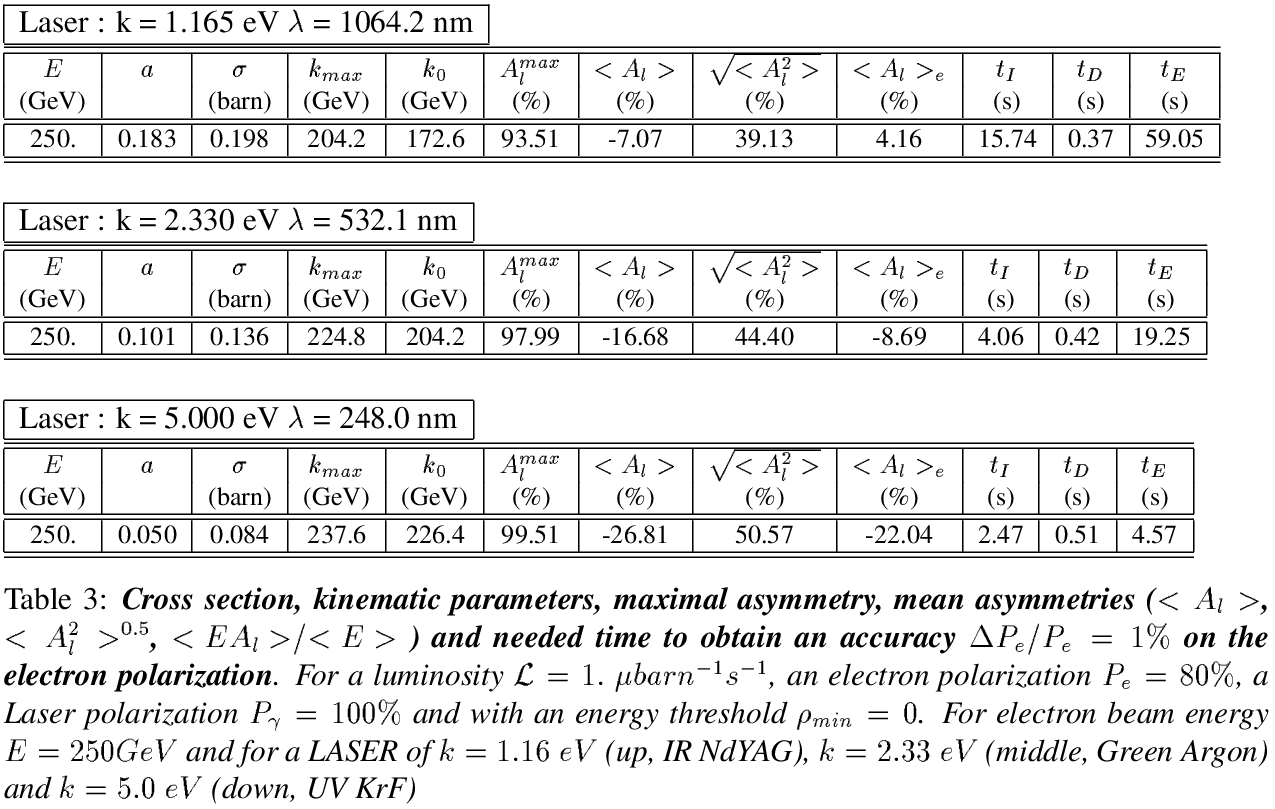

In [20]:
print ("Kinematical constant a = ", _a(k = 1.165, E = 250e9))
print ("Cross section [barn] = ", sigma(k = 1.165, E = 250e9) / barn)
print ("Maximum photon energy [GeV] = ", _kp_max(k = 1.165, E = 250e9) / 1e9)
print ("Photon energy at A 0 [GeV] = ", kp_zero(k = 1.165, E = 250e9) / 1e9)
print ("Maximum longitudinal asymmetry = ", Along_max(k = 1.165, E = 250e9))
print ("<A_long> (regular) = ", avg_regular(k = 1.165, E = 250e9))
print ("sqrt(<A_long^2>) (differential) = ", np.sqrt(avg_differential(k = 1.165, E = 250e9)))
print ("<E A_long>/<E> (energy-weighted regular) = ", avg_regular_energyweighted(k = 1.165, E = 250e9))
print ("<A_long^2> (differential) = ", avg_differential(k = 1.165, E = 250e9))
print ("<A_long>^2 (integral) = ", avg_integral(k = 1.165, E = 250e9))
print ("<E A_long>^2/<E^2> (energy-weighted) = ", avg_energyweighted(k = 1.165, E = 250e9))
print ("t_I [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 1.165, E = 250e9) / avg_integral(k = 1.165, E = 250e9))
print ("t_D [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 1.165, E = 250e9) / avg_differential(k = 1.165, E = 250e9))
print ("t_E [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 1.165, E = 250e9) / avg_energyweighted(k = 1.165, E = 250e9))

Kinematical constant a =  0.18309815463311344
Cross section [barn] =  0.1978994033110807
Maximum photon energy [GeV] =  204.22546134172163
Photon energy at A 0 [GeV] =  249.99999999957083
Maximum longitudinal asymmetry =  0.9351250596483641
<A_long> (regular) =  -0.07070276578485374
sqrt(<A_long^2>) (differential) =  0.39131144076135244
<E A_long>/<E> (energy-weighted regular) =  0.04164161098456519
<A_long^2> (differential) =  0.15312464367072542
<A_long>^2 (integral) =  0.004998881089627884
<E A_long>^2/<E^2> (energy-weighted) =  0.0013279671652035568
t_I [s] / 1 ubarn =  15.794385547486085
t_D [s] / 1 ubarn =  0.5156208259031184
t_E [s] / 1 ubarn =  59.45497547261847


In [21]:
print ("Kinematical constant a = ", _a(k = 2.33, E = 250e9))
print ("Cross section [barn] = ", sigma(k = 2.33, E = 250e9) / barn)
print ("Maximum photon energy [GeV] = ", _kp_max(k = 2.33, E = 250e9) / 1e9)
print ("Photon energy at A 0 [GeV] = ", kp_zero(k = 2.33, E = 250e9) / 1e9)
print ("Maximum longitudinal asymmetry = ", Along_max(k = 2.33, E = 250e9))
print ("<A_long> (regular) = ", avg_regular(k = 2.33, E = 250e9))
print ("sqrt(<A_long^2>) (differential) = ", np.sqrt(avg_differential(k = 2.33, E = 250e9)))
print ("<E A_long>/<E> (energy-weighted regular) = ", avg_regular_energyweighted(k = 2.33, E = 250e9))
print ("<A_long^2> (differential) = ", avg_differential(k = 2.33, E = 250e9))
print ("<A_long>^2 (integral) = ", avg_integral(k = 2.33, E = 250e9))
print ("<E A_long>^2/<E^2> (energy-weighted) = ", avg_energyweighted(k = 2.33, E = 250e9))
print ("t_I [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 2.33, E = 250e9) / avg_integral(k = 2.33, E = 250e9))
print ("t_D [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 2.33, E = 250e9) / avg_differential(k = 2.33, E = 250e9))
print ("t_E [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 2.33, E = 250e9) / avg_energyweighted(k = 2.33, E = 250e9))

Kinematical constant a =  0.10077492909152748
Cross section [barn] =  0.13570712831854567
Maximum photon energy [GeV] =  224.80626772711807
Photon energy at A 0 [GeV] =  249.9999999997854
Maximum longitudinal asymmetry =  0.9798930254491498
<A_long> (regular) =  -0.16684082401940376
sqrt(<A_long^2>) (differential) =  0.4439995582150821
<E A_long>/<E> (energy-weighted regular) =  -0.0868730983352418
<A_long^2> (differential) =  0.19713560769518806
<A_long>^2 (integral) =  0.027835860559473652
<E A_long>^2/<E^2> (energy-weighted) =  0.006010731583520543
t_I [s] / 1 ubarn =  4.136306506926132
t_D [s] / 1 ubarn =  0.5840530409709934
t_E [s] / 1 ubarn =  19.15534732472651


In [22]:
print ("Kinematical constant a = ", _a(k = 5, E = 250e9))
print ("Cross section [barn] = ", sigma(k = 5, E = 250e9) / barn)
print ("Maximum photon energy [GeV] = ", _kp_max(k = 5, E = 250e9) / 1e9)
print ("Photon energy at A 0 [GeV] = ", kp_zero(k = 5, E = 250e9) / 1e9)
print ("Maximum longitudinal asymmetry = ", Along_max(k = 5, E = 250e9))
print ("<A_long> (regular) = ", avg_regular(k = 5, E = 250e9))
print ("sqrt(<A_long^2>) (differential) = ", np.sqrt(avg_differential(k = 5, E = 250e9)))
print ("<E A_long>/<E> (energy-weighted regular) = ", avg_regular_energyweighted(k = 5, E = 250e9))
print ("<A_long^2> (differential) = ", avg_differential(k = 5, E = 250e9))
print ("<A_long>^2 (integral) = ", avg_integral(k = 5, E = 250e9))
print ("<E A_long>^2/<E^2> (energy-weighted) = ", avg_energyweighted(k = 5, E = 250e9))
print ("t_I [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 5, E = 250e9) / avg_integral(k = 5, E = 250e9))
print ("t_D [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 5, E = 250e9) / avg_differential(k = 5, E = 250e9))
print ("t_E [s] / 1 ubarn = ", 1.0 / (1e6/barn) / np.square(0.01) / np.square(0.8) / np.square(1) / sigma(k = 5, E = 250e9) / avg_energyweighted(k = 5, E = 250e9))

Kinematical constant a =  0.049632004312607836
Cross section [barn] =  0.08407900085553287
Maximum photon energy [GeV] =  237.59199892184807
Photon energy at A 0 [GeV] =  249.9999999999
Maximum longitudinal asymmetry =  0.9950854345211682
<A_long> (regular) =  -0.26812445697487997
sqrt(<A_long^2>) (differential) =  0.5057016700024933
<E A_long>/<E> (energy-weighted regular) =  -0.22041061446632682
<A_long^2> (differential) =  0.2557341790433107
<A_long>^2 (integral) =  0.07189072442807426
<E A_long>^2/<E^2> (energy-weighted) =  0.04013796232877548
t_I [s] / 1 ubarn =  2.5849945031698747
t_D [s] / 1 ubarn =  0.7266808377772576
t_E [s] / 1 ubarn =  4.629959188093684


### Verification of table 1 in EIC report

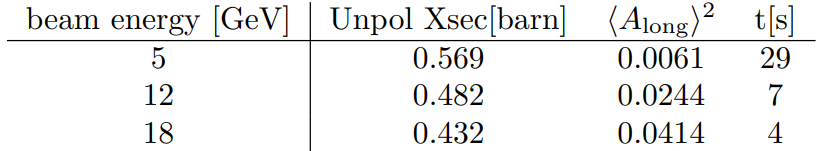

In [23]:
print ("Cross section [barn] = ", sigma(k, E = 5*GeV) / barn)
print ("Cross section [barn] = ", sigma(k, E = 7*GeV) / barn)
print ("Cross section [barn] = ", sigma(k, E = 12*GeV) / barn)
print ("Cross section [barn] = ", sigma(k, E = 18*GeV) / barn)
print ("<A_long^2> (differential) = ", avg_differential(k, E = 5*GeV))
print ("<A_long^2> (differential) = ", avg_differential(k, E = 7*GeV))
print ("<A_long^2> (differential) = ", avg_differential(k, E = 12*GeV))
print ("<A_long^2> (differential) = ", avg_differential(k, E = 18*GeV))

Cross section [barn] =  0.5689181855608736
Cross section [barn] =  0.5398493226141556
Cross section [barn] =  0.482275697300614
Cross section [barn] =  0.4321043195932437
<A_long^2> (differential) =  0.006054285664863695
<A_long^2> (differential) =  0.010676170610497845
<A_long^2> (differential) =  0.024357457975968246
<A_long^2> (differential) =  0.04133995575758013


### Verification of table 3 in EIC report

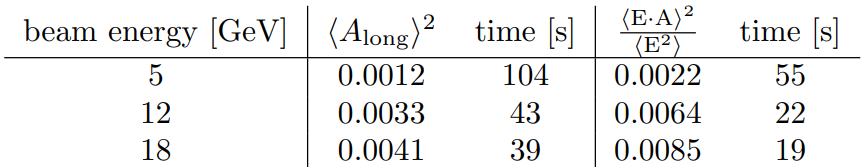

In [24]:
print ("<A_long>^2 (integral) = ", avg_integral(k, E = 5*GeV))
print ("<A_long>^2 (integral) = ", avg_integral(k, E = 7*GeV))
print ("<A_long>^2 (integral) = ", avg_integral(k, E = 12*GeV))
print ("<A_long>^2 (integral) = ", avg_integral(k, E = 18*GeV))
print ("<E A_long>^2/<E^2> (energy-weighted) = ", avg_energyweighted(k, E = 5*GeV))
print ("<E A_long>^2/<E^2> (energy-weighted) = ", avg_energyweighted(k = 5, E = 7*GeV))
print ("<E A_long>^2/<E^2> (energy-weighted) = ", avg_energyweighted(k, E = 12*GeV))
print ("<E A_long>^2/<E^2> (energy-weighted) = ", avg_energyweighted(k, E = 18*GeV))

<A_long>^2 (integral) =  0.0011746322708702341
<A_long>^2 (integral) =  0.0018723303506850933
<A_long>^2 (integral) =  0.00331171483426929
<A_long>^2 (integral) =  0.004101627873226803
<E A_long>^2/<E^2> (energy-weighted) =  0.0038815007942827546
<E A_long>^2/<E^2> (energy-weighted) =  0.016792350074685203
<E A_long>^2/<E^2> (energy-weighted) =  0.013308628118049441
<E A_long>^2/<E^2> (energy-weighted) =  0.01956369332100837


$$ \langle A \rangle^2 / \langle E \rangle $$

In [25]:
def avg_energyweighted_for_EIC (k = default_k, E = default_E, rho_min = 0, rho_max = 1):
    return np.square(avg(lambda rho, k, E: Along(rho, k, E), k, E, rho_min, rho_max)) / \
           avg(lambda rho, k, E: rho, k, E, rho_min, rho_max)

In [26]:
print ("<E> = ", avg(lambda rho, k, E: rho, k, E, 0, 1))

print ("<A_long>^2/<E> (energy-weighted) = ", avg_energyweighted_for_EIC(k, E = 5*GeV))
print ("<A_long>^2/<E> (energy-weighted) = ", avg_energyweighted_for_EIC(k, E = 7*GeV))
print ("<A_long>^2/<E> (energy-weighted) = ", avg_energyweighted_for_EIC(k, E = 12*GeV))
print ("<A_long>^2/<E> (energy-weighted) = ", avg_energyweighted_for_EIC(k, E = 18*GeV))

<E> =  0.491223878973174
<A_long>^2/<E> (energy-weighted) =  0.002380084225538626
<A_long>^2/<E> (energy-weighted) =  0.003804993590538219
<A_long>^2/<E> (energy-weighted) =  0.006752119594056071
<A_long>^2/<E> (energy-weighted) =  0.008349813697576366


## Luminosity

In [27]:
# N_e = Q/e/c
N_e = I/e/c
N_gamma = P*l/h/c/c
N_p = P*6.242e18/5/f

### Continuous Laser Beam

For continuous laser beams at crossing angle $\alpha_c$ the luminosity is $$\mathcal{L} = \frac{1+\cos\alpha}{\sin\alpha} \frac{I}{e} \frac{P_L\lambda}{hc^2} \frac{1}{\sqrt{2\pi}\sqrt{\sigma_{e,y}^2 + \sigma_{\gamma,y}^2}}.$$

In [28]:
 # Luminosity for continuous wave laser
# def L_CW (alpha):
#     return Q*f_b/e * P*l/h/c/c / math.sqrt(2*math.pi) * (1 + np.cos(alpha)) / np.sin(alpha) / np.sqrt(sey*sey + spy*spy)
def L_CW (alpha):
    return (I/e * N_gamma * (1 + np.cos(alpha))) / (math.sqrt(2*math.pi) * np.sin(alpha) * np.sqrt(sey**2 + spy**2))

### Pulsed Laser Beam

For pulsed laser beams at crossing angle $\alpha_c$ the luminosity is $$\mathcal{L} = \frac{1+\cos\alpha}{\sin\alpha} \frac{I}{e} \frac{c}{f_{beam}} \frac{P_L\lambda}{hc^2} \frac{1}{\sqrt{2\pi} \sqrt{\sigma_{e,y}^2 + \sigma_{\gamma,y}^2}} \frac{1}{\sqrt{2\pi} \sqrt{\sigma_{e,z}^2 + \sigma_{\gamma,z}^2 + \frac{\sigma_{e,y}^2 + \sigma_{\gamma,y}^2}{\sin^2\alpha/2}}}$$
\
Alternative formula:

$$\mathcal{L} = N_{e}N_{\gamma}f\frac{cos(\alpha/2)}{2\pi}\frac{1}{\sqrt{\sigma_{e,y}^2+\sigma_{\gamma,y}^2}\sqrt{(\sigma_{\gamma,x}^2+\sigma_{e,x}^2)\cos^2(\alpha/2)+(\sigma_{e,z}^2+\sigma_{\gamma,z}^2)\sin^2(\alpha/2)}}$$

In [29]:
# Luminosity for pulsed laser
# def L_pulsed (alpha):
#     return I/e * c/(1/12e-12) * P*l/h/c/c * (1 + np.cos(alpha)) / (2*np.pi) / \
#     np.sqrt(sey**2 + spy**2) / \
#     np.sqrt(sex*sex*np.square(1+np.cos(alpha)) \
#               + spx*spx*np.square(1+np.cos(alpha)) \
#               + (sez*sez + spz*spz)*np.square(np.sin(alpha)))
###
def L_pulsed (alpha):
    return (1 + np.cos(alpha))/(2*np.pi*np.sin(alpha)) * I/e * c/f_b * P*1064e-9/h/c/c \
    * 1/(np.sqrt(sey**2 + spy**2)) * (sez**2 + spz**2 + (sey**2 + spy**2)/(np.sin(alpha/2)**2))**(-1/2)

### alternative method
def L_altpulsed (alpha):
  return N_e * N_p * f * np.cos(alpha/2)/(2*np.pi) * 1/(np.sqrt(sey**2 + spy**2) \
  * np.sqrt((spx**2+sex**2)*np.cos(alpha/2)**2 + (sez**2+spz**2)*np.sin(alpha/2)**2))

In [30]:
print(c/(1/12e-12)) # not sure what this should be
print(L_CW(math.radians(3))/(1/cm**2/s), " 1/cm^2/s")
print(L_pulsed(math.radians(3))/(1/cm**2/s), " 1/cm^2/s") # should be of order 10^29
print(L_altpulsed(math.radians(3))/(1/cm**2/s), " 1/cm^2/s")

0.0035975094960000002
1.934352536307553e+29  1/cm^2/s
3.705528474964657e+34  1/cm^2/s
1.7002781737283209e+30  1/cm^2/s


### Fixed Luminosity

In [31]:
L = 1e6/barn # /m^2/s

In [32]:
print(L)

1.0000000000000001e+34


$$t_D^{-1} \approx \mathcal{L} \Bigl( \frac{\Delta P_e}{P_e} \Bigr)^2 P_e^2 P_\gamma^2 \sigma_t \frac{\langle E A \rangle^2}{\langle E^2 \rangle},$$

In [33]:
def t_inv (L, A, k, E):
    return L(math.radians(3)) * (0.01)**2 * (0.85)**2 * P_gamma**2 * sigma(k, E) * A(k, E)

### Verification of table 3 in EIC report

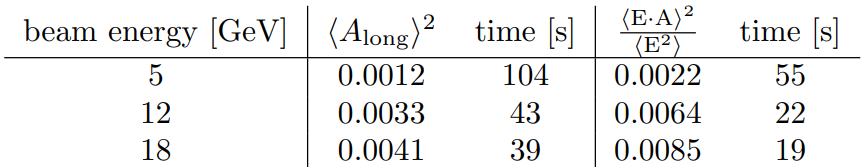

In [34]:
print ("t (1%) = ", 1 / t_inv(L_CW, avg_differential, k = 2.33, E = 5e9)) # 5 GeV
print ("t (1%) = ", 1 / t_inv(L_CW, avg_differential, k = 2.33, E = 7e9)) # 7 GeV
print ("t (1%) = ", 1 / t_inv(L_CW, avg_differential, k = 2.33, E = 12e9)) # 12 GeV
print ("t (1%) = ", 1 / t_inv(L_CW, avg_differential, k = 2.33, E = 18e9)) # 18 GeV

t (1%) =  20.773697162612322
t (1%) =  12.414763626676274
t (1%) =  6.091148418392649
t (1%) =  4.00560302153046


### Verification of table 4 in EIC report

### Comparison

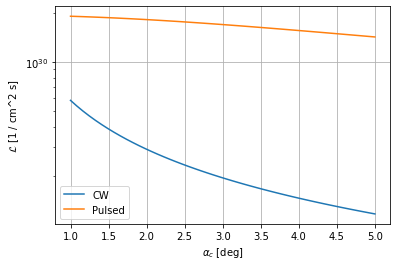

In [35]:
# Plot of CW vs pulsed laser luminosity
alpha_ = np.linspace(1.0,5.0)

ax = plt.figure()
ax = plt.subplot(yscale="log", xlabel= r'$\alpha_c$ [deg]', 
                 ylabel=r'$\mathcal{L}$ [1 / cm^2 s]')

ax.plot(alpha_,L_CW(np.radians(alpha_))/(1/cm**2/s),
        alpha_,L_altpulsed(np.radians(alpha_))/(1/cm**2/s))
# plt.xlim(1, 5)
# plt.ylim(2*10e26, 10e29)
# ax.grid(which='both', alpha=0.8, ls='--')
# ax.yscale("log")
ax.grid()
ax.legend(['CW', 'Pulsed'])

### Rate (Luminosity * Differential Cross-Section) vs Distance 

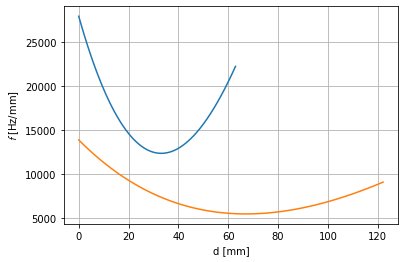

In [36]:
# Setting up figure
ax = plt.figure()
ax = plt.subplot(xlabel= r'd [mm]', 
                 ylabel=r'$\mathcal{f}$ [Hz/mm]')
ax.grid()

# Plots
ax.plot(dist(7*GeV-rho*_kp_max(1.2, 7*GeV)) / mm, L_altpulsed(np.radians(3)) * dsigma(rho, 1.16, 7*GeV) / -_kp_max(1.16, 7*GeV) / dist_diff(7*GeV-rho*_kp_max(1.16, 7*GeV)) / (Hz/mm))
ax.plot(dist(7*GeV-rho*_kp_max(  k, 7*GeV)) / mm, L_altpulsed(np.radians(3)) * dsigma(rho,    k, 7*GeV) / -_kp_max(   k, 7*GeV) / dist_diff(7*GeV-rho*_kp_max(   k, 7*GeV)) / (Hz/mm))

## Legend

## Time to 1% Per Bunch

In [37]:
def time_to_uncertainty (L, A, unc, alpha):
    return 1 / (L(alpha) * sigma() * P_e*P_e * P_gamma*P_gamma * unc*unc * A())

In [38]:
time_to_uncertainty (L_CW, avg_differential, 0.01, np.radians(3))

3.2061508566829042

## References

EIC Compton Polarimeter Letter of Intent (2020), https://wiki.bnl.gov/conferences/images/1/1b/EIC_Compton_LOI_Jan-2020.pdf

EIC Compton Polarimeter YR Polarimetry Meeting (April 7, 2020), https://wiki.bnl.gov/conferences/images/b/b9/EIC-Compton_laser.pdf

JLab Hall A Compton Polarimeter Design Document (1997), https://hallaweb.jlab.org/compton/Documentation/Technical/1997/tesla.ps.gz

T. Akagi et al., J. Inst., 7 (2012) P01021. https://iopscience.iop.org/article/10.1088/1748-0221/7/01/P01021